In [8]:
#%matplotlib inline
import math as math
import matplotlib.pyplot as plt 

In [9]:
dimensions=3
iterations=300

In [10]:
def sign(x):
    if x>0:
        return 1
    else:
        return -1

In [11]:
#read the training data
x=[]
for i in range(dimensions-1):
    x.append([])
y=[]
with open('../hw2_adaboost_train.dat') as file:
    for line in file:
        for i,value in enumerate(line.split()):
            if i!=dimensions-1:
                x[i].append(float(value))
            else:
                y.append(int(value))
    file.close()


In [12]:
#calculate the threshold
x_sorted=[]
for i in range(dimensions-1):
    x_sorted.append(sorted(x[i]))
threshold=[]
for i in range(dimensions-1):
    threshold.append([])
    threshold[i]=[0]*len(x[0])
    threshold[i][0]=x_sorted[i][0]-1
for i in range(dimensions-1):
    for j in range(1,len(x[0])):
        threshold[i][j]=(x_sorted[i][j-1]+x_sorted[i][j])/2

In [13]:
#initialize the weight
u=[]
u.append(1/len(x_sorted[0]))
u=u*len(x_sorted[0])
u_record=[]

In [14]:
alpha=[]
g=[]
Ein_g_record=[]
epsilon_t_record=[]
#training
for k in range(iterations):
    u_record.append(u[:])
    best_Ein_u=100
    best_sign=1
    best_feature=0
    best_threshold=-100
    for i in range(dimensions-1):
        for s in [1,-1]:
            for t in threshold[i]:
                Ein_u=0
                for n,x_n in enumerate(x[i]):
                    if sign(s*(x_n-t))!=y[n]:
                        Ein_u+=u[n]
                Ein_u/=len(x[0])
                if Ein_u<best_Ein_u:
                    best_Ein_u=Ein_u
                    best_sign=s
                    best_feature=i
                    best_threshold=t
    update_factor=0
    for n in range(len(x[0])):
        if sign(best_sign*(x[best_feature][n]-best_threshold))!=y[n]:
            update_factor+=u[n]
    update_factor/=sum(u)
    epsilon_t_record.append(update_factor)
    update_factor=math.sqrt((1-update_factor)/update_factor)
    Ein_g=0
    for n in range(len(x[0])):
        if sign(best_sign*(x[best_feature][n]-best_threshold))==y[n]:
            u[n]/=update_factor
        else:
            u[n]*=update_factor
            Ein_g+=1
    Ein_g/=len(x[0])
    alpha.append(math.log(update_factor))
    g.append((best_feature,best_threshold,best_sign))
    Ein_g_record.append(Ein_g)

Ein(g1): 0.24 alpha 1: 0.576339754969193


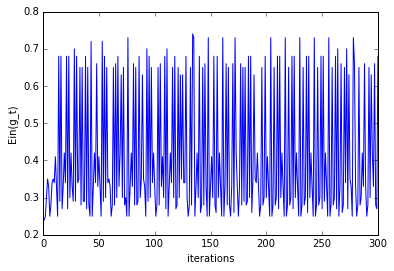

In [15]:
plt.plot(range(1,iterations+1),Ein_g_record)
plt.ylabel('Ein(g_t)')
plt.xlabel('iterations')
print('Ein(g1):',Ein_g_record[0],'alpha 1:',alpha[0])

In [16]:
Ein_G_record=[]
for k in range(iterations):
    Ein_G=0
    for n in range(len(x[0])):
        G=0
        for t in range(k+1):
             G+=alpha[t]*g[t][2]*sign(x[g[t][0]][n]-g[t][1])
        if sign(G*y[n])!=1:
            Ein_G+=1
    Ein_G/=len(x[0])
    Ein_G_record.append(Ein_G)
print('Ein(G):',Ein_G_record[iterations-1])

Ein(G): 0.0


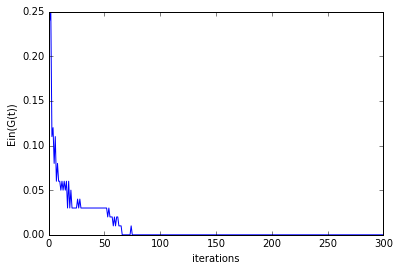

In [17]:
plt.plot(range(1,iterations+1),Ein_G_record)
plt.ylabel('Ein(G(t))')
plt.xlabel('iterations')

In [18]:
sum_u=[]
for k in range(iterations):
    sum_u.append(sum(u_record[k]))

u(2): 0.8541662601625057 u(T): 0.005465124119345917


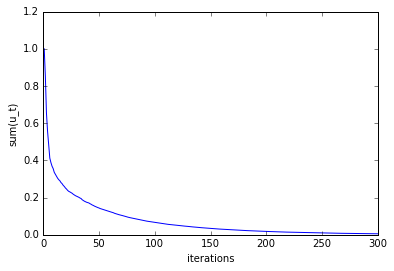

In [19]:
plt.plot(range(1,iterations+1),sum_u)
plt.ylabel('sum(u_t)')
plt.xlabel('iterations')
print('u(2):',sum_u[1],'u(T):',sum_u[iterations-1])

minimum epsilon_t: 0.17872807017543846 index: 2


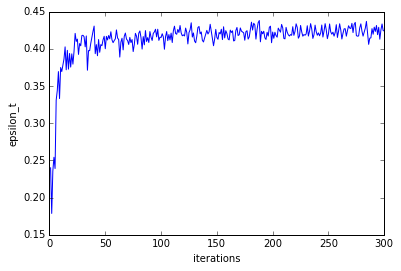

In [20]:
plt.plot(range(1,iterations+1),epsilon_t_record)
plt.ylabel('epsilon_t')
plt.xlabel('iterations')
print('minimum epsilon_t:',min(epsilon_t_record),'index:',epsilon_t_record.index(min(epsilon_t_record))+1)

In [21]:
#read the testing data
x2=[]
for i in range(dimensions-1):
    x2.append([])
y2=[]
with open('../hw2_adaboost_test.dat') as file:
    for line in file:
        for i,value in enumerate(line.split()):
            if i!=dimensions-1:
                x2[i].append(float(value))
            else:
                y2.append(int(value))
    file.close()

In [22]:
Eout_g_record=[]
for k in range(iterations):
    Eout_g=0
    for n in range(len(x2[0])):
        if sign(g[k][2]*sign(x2[g[k][0]][n]-g[k][1]))!=y2[n]:
            Eout_g+=1
    Eout_g/=len(x2[0])
    Eout_g_record.append(Eout_g)

Eout(g1): 0.29


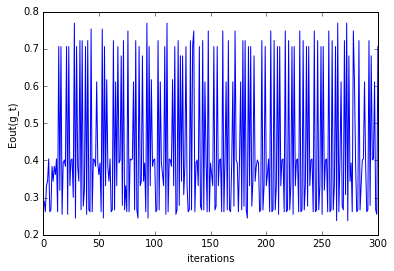

In [23]:
plt.plot(range(1,iterations+1),Eout_g_record)
plt.ylabel('Eout(g_t)')
plt.xlabel('iterations')
print('Eout(g1):',Eout_g_record[0])

In [24]:
Eout_G_record=[]
for k in range(iterations):
    Eout_G=0
    for n in range(len(x2[0])):
        G=0
        for t in range(k+1):
            G+=alpha[t]*g[t][2]*sign(x2[g[t][0]][n]-g[t][1])
        if sign(G)!=y2[n]:
            Eout_G+=1
    Eout_G/=len(x2[0])
    Eout_G_record.append(Eout_G)
print('Eout(G):',Eout_G_record[iterations-1])

Eout(G): 0.132


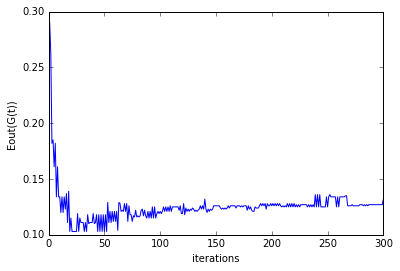

In [25]:
plt.plot(range(1,iterations+1),Eout_G_record)
plt.ylabel('Eout(G(t))')
plt.xlabel('iterations')